In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Desastres

In [ ]:
df_ATLAS = pd.read_csv('/content/atlas_Digital.csv', encoding='latin1', sep=';', low_memory=False)

df_ATLAS.head()

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,Cod_Cobrade,tipologia,descricao_tipologia,grupo_de_desastre,...,PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR
0,SC-D-4215406-14110-19910107,Salto Veloso,SC,Sul,07/01/1991,07/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,RS-D-4313102-14110-19910112,Nova Palma,RS,Sul,12/01/1991,12/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,RS-D-4304952-14110-19910115,Caseiros,RS,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,SC-D-4208609-14110-19910115,Jaborá,SC,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,SC-D-4207650-14110-19910118,Iporã do Oeste,SC,Sul,18/01/1991,18/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [ ]:
df_Temporarias = ['Nome_Municipio', 'Sigla_UF', 'regiao', 'Data_Evento', 'descricao_tipologia', 'grupo_de_desastre']

In [ ]:
df_ATLAS_temp = df_ATLAS[df_Temporarias]

In [ ]:
df_valinhos = df_ATLAS_temp[
    (df_ATLAS_temp["Nome_Municipio"].str.contains("VALINHOS", case=False, na=False)) &
    (df_ATLAS_temp["Sigla_UF"] == "SP") &
    (df_ATLAS_temp["grupo_de_desastre"].str.contains("HIDROL", case=False, na=False))
].copy()

# ============================
# Forçar conversão violenta de Data_Evento
# ============================
df_valinhos["Data_Evento"] = pd.to_datetime(
    df_valinhos["Data_Evento"],
    errors="coerce",
    dayfirst=True
)

print("Datas inválidas:", df_valinhos["Data_Evento"].isna().sum())

# Agora está garantido que .dt funciona
df_valinhos["Ano"] = df_valinhos["Data_Evento"].dt.year
df_valinhos["Mes"] = df_valinhos["Data_Evento"].dt.month

# Filtrar só 2023
df_des2023 = df_valinhos[df_valinhos["Ano"] == 2023]

df_des_mensal = df_des2023.groupby("Mes").size().reset_index(name="Desastres")

Datas inválidas: 0


# 1- Rio Atibaia(João)

In [ ]:
df_Rio_Atibaia_2020 = pd.read_csv('/content/dados_202001010000_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202001010000.csv')
df_Rio_Atibaia_2022 = pd.read_csv('/content/dados_202201010010_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202201010010.csv')
df_Rio_Atibaia_2024 = pd.read_csv('/content/dados_202401010010_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202401010010.csv')


print(f'Tabela 1: {df_Rio_Atibaia_2020.columns}')
print(f'Tabela 2: {df_Rio_Atibaia_2022.head()}')
print(f'Tabela 3: {df_Rio_Atibaia_2024.tail()}')

Tabela 1: Index(['Posto', 'DATA', 'Unnamed: 2', 'PLU(mm)', 'FLU(m)', 'Q(m3/s)',
       'Bateria(V)', 'Cota (m)'],
      dtype='object')
Tabela 2:    Posto                  DATA  Unnamed: 2  PLU(mm)  FLU(m)  Q(m3/s)  \
0     56   2022-01-01 00:10:00        29.0    1.326  22.674   12.841   
1     56   2022-01-01 00:20:00        29.0    1.328  22.736   12.690   
2     56   2022-01-01 00:30:00        29.0    1.331  22.830   12.740   
3     56   2022-01-01 00:40:00        29.0    1.335  22.954   12.791   
4     56   2022-01-01 00:50:00        29.0    1.338  23.048   12.740   

   Bateria(V)  Cota (m)  
0     656.876       NaN  
1     656.878       NaN  
2     656.881       NaN  
3     656.885       NaN  
4     656.888       NaN  
Tabela 3:        Posto                  DATA  Unnamed: 2  PLU(mm)  FLU(m)  Q(m3/s)  \
91927     56   2025-09-30 23:20:00         0.0    0.888  10.051   12.640   
91928     56   2025-09-30 23:30:00         0.0    0.888  10.051   12.640   
91929     56   2025-09-30 2

In [ ]:
df_Rio_Atibaia = pd.concat([df_Rio_Atibaia_2020, df_Rio_Atibaia_2022, df_Rio_Atibaia_2024], ignore_index=True, join="inner")

df_Rio_Atibaia

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,56,2020-01-01 00:00:00,0.0,0.954,11.808,12.816,656.504,NaN
1,56,2020-01-01 00:10:00,0.0,0.954,11.808,12.715,656.504,NaN
2,56,2020-01-01 00:20:00,0.0,0.958,11.916,12.740,656.508,NaN
3,56,2020-01-01 00:30:00,0.0,0.959,11.944,12.690,656.509,NaN
4,56,2020-01-01 00:40:00,0.0,0.954,11.808,12.640,656.504,NaN
...,...,...,...,...,...,...,...,...
302286,56,2025-09-30 23:20:00,0.0,0.888,10.051,12.640,656.438,NaN
302287,56,2025-09-30 23:30:00,0.0,0.888,10.051,12.640,656.438,NaN
302288,56,2025-09-30 23:40:00,0.0,0.888,10.051,12.665,656.438,NaN
302289,56,2025-09-30 23:50:00,0.0,0.889,10.077,12.640,656.439,NaN


    Mes       PLU        FLU  Desastres
0     1  1.985004  47.767133        5.0
1     2  1.800889  39.941319        2.0
2     3  1.622307  33.897766        0.0
3     4  1.213923  19.675396        0.0
4     5  0.999978  13.081950        0.0
5     6  1.092918  15.809808        0.0
6     7  0.985975  12.682123        0.0
7     8  0.967784  12.191604        0.0
8     9  1.077432  15.401482        0.0
9    10  1.572009  32.199502        1.0
10   11  1.282091  21.814081        0.0
11   12  1.211535  19.890577        0.0


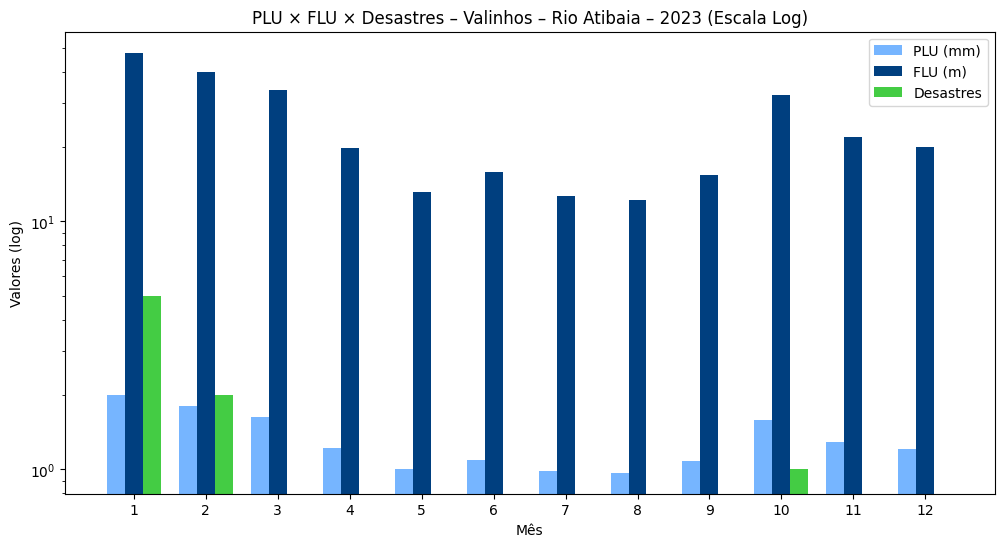

In [ ]:
# Renomear
df_Rio_Atibaia.rename(columns={
    "DATA": "Data",
    "PLU(mm)": "PLU",
    "FLU(m)": "FLU"
}, inplace=True)

df_Rio_Atibaia["Data"] = pd.to_datetime(df_Rio_Atibaia["Data"], errors="coerce")
df_Rio_Atibaia["Ano"] = df_Rio_Atibaia["Data"].dt.year
df_Rio_Atibaia["Mes"] = df_Rio_Atibaia["Data"].dt.month

# Filtrar 2023 — NÃO TEM DADOS → INTERPOLAÇÃO
df_rio_2023 = df_Rio_Atibaia[df_Rio_Atibaia["Ano"] == 2023]

if df_rio_2023.empty:
    print("⚠ Sem dados de 2023 — interpolando entre 2022 e 2024")

    df_rio_2022 = df_Rio_Atibaia[df_Rio_Atibaia["Ano"] == 2022].groupby("Mes")[["PLU","FLU"]].mean()
    df_rio_2024 = df_Rio_Atibaia[df_Rio_Atibaia["Ano"] == 2024].groupby("Mes")[["PLU","FLU"]].mean()

    df_rio_mensal = (df_rio_2022 + df_rio_2024) / 2
    df_rio_mensal = df_rio_mensal.reset_index()
else:
    df_rio_mensal = df_rio_2023.groupby("Mes")[["PLU","FLU"]].mean().reset_index()

# ==========================================
# 2) DESASTRES – JÁ PRONTO COMO df_des_mensal
# ==========================================
df_final = pd.merge(df_rio_mensal, df_des_mensal, on="Mes", how="left").fillna(0)

print(df_final)

# ==========================================
# 3) GRÁFICO LOG
# ==========================================
plt.figure(figsize=(12,6))
plt.title("PLU × FLU × Desastres – Valinhos – Rio Atibaia – 2023 (Escala Log)")

x = df_final["Mes"]
w = 0.25

# CORES PERSONALIZADAS
plt.bar(x - w, df_final["PLU"], width=w, label="PLU (mm)", color="#76b5ff")    # azul claro
plt.bar(x, df_final["FLU"], width=w, label="FLU (m)", color="#003f7f")         # azul escuro
plt.bar(x + w, df_final["Desastres"], width=w, label="Desastres", color="#44cc44")  # verde

plt.yscale("log")
plt.xticks(x)
plt.xlabel("Mês")
plt.ylabel("Valores (log)")
plt.legend()

plt.show()

# 2- Cidade universitaria(João)

In [ ]:
df_cidade_universitaria_2020 = pd.read_csv('./Dados_SAISP/dados_202001010000_P277_Rio_Pinheiros___Ponte_Cid__Universit_ria_202001010000.csv')
df_cidade_universitaria_2024 = pd.read_csv('./Dados_SAISP/dados_202201010010_P277_Rio_Pinheiros___Ponte_Cid__Universit_ria_202201010010.csv')

df_cidade_universitaria_2020
df_cidade_universitaria_2024

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,277,2022-01-01 00:10:00,48.75,716.067,12.388,NaN
1,277,2022-01-01 00:20:00,48.75,716.046,12.489,NaN
2,277,2022-01-01 00:30:00,48.75,716.026,12.338,NaN
3,277,2022-01-01 00:40:00,48.75,716.010,12.439,NaN
4,277,2022-01-01 00:50:00,48.75,715.995,12.363,NaN
...,...,...,...,...,...,...
105115,277,2023-12-31 23:20:00,0.00,715.813,12.539,NaN
105116,277,2023-12-31 23:30:00,0.00,715.813,12.615,NaN
105117,277,2023-12-31 23:40:00,0.00,715.814,12.564,NaN
105118,277,2023-12-31 23:50:00,0.00,715.814,12.564,NaN


In [ ]:
df_cidade_universitaria = pd.concat([df_cidade_universitaria_2020, df_cidade_universitaria_2024 ], ignore_index=True, join="inner")

df_cidade_universitaria.tail()

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
210266,277,2023-12-31 23:20:00,0.0,715.813,12.539,NaN
210267,277,2023-12-31 23:30:00,0.0,715.813,12.615,NaN
210268,277,2023-12-31 23:40:00,0.0,715.814,12.564,NaN
210269,277,2023-12-31 23:50:00,0.0,715.814,12.564,NaN
210270,277,2024-01-01 00:00:00,0.0,715.814,12.439,NaN


# 3- Rio tiete jardim romano(Arnon)

In [ ]:
df_tiete_jard_romano_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P168_Rio_Tiet____Jardim_Romano_202001010000.csv')
df_tiete_jard_romano_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P168_Rio_Tiet____Jardim_Romano_202201010010.csv')
df_tiete_jard_romano_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P168_Rio_Tiet____Jardim_Romano_202401010010.csv')

In [ ]:
df_tiete_jard_romano_2024_2025

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,168,2024-01-01 00:10:00,0.0,730.018,12.293,NaN
1,168,2024-01-01 00:20:00,0.0,730.018,12.268,NaN
2,168,2024-01-01 00:30:00,0.0,730.018,12.268,NaN
3,168,2024-01-01 00:40:00,0.0,730.018,12.293,NaN
4,168,2024-01-01 00:50:00,0.0,730.018,12.268,NaN
...,...,...,...,...,...,...
91987,168,2025-09-30 23:20:00,0.0,729.839,12.740,NaN
91988,168,2025-09-30 23:30:00,0.0,729.839,12.690,NaN
91989,168,2025-09-30 23:40:00,0.0,729.838,12.564,NaN
91990,168,2025-09-30 23:50:00,0.0,729.838,12.665,NaN


In [ ]:
df_tiete_jard_romano = pd.concat([
    df_tiete_jard_romano_2020_2021,
    df_tiete_jard_romano_2022_2023,
    df_tiete_jard_romano_2024_2025
], ignore_index=True, join="inner")

df_tiete_jard_romano

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,168,2020-01-01 00:00:00,6.4,729.863,NaN,NaN
1,168,2020-01-01 00:10:00,6.4,729.863,NaN,NaN
2,168,2020-01-01 00:20:00,6.4,729.862,NaN,NaN
3,168,2020-01-01 00:30:00,6.4,729.862,NaN,NaN
4,168,2020-01-01 00:40:00,6.4,729.862,NaN,NaN
...,...,...,...,...,...,...
302074,168,2025-09-30 23:20:00,0.0,729.839,12.740,NaN
302075,168,2025-09-30 23:30:00,0.0,729.839,12.690,NaN
302076,168,2025-09-30 23:40:00,0.0,729.838,12.564,NaN
302077,168,2025-09-30 23:50:00,0.0,729.838,12.665,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
df_tiete_jard_romano['DataHora'] = pd.to_datetime(df_tiete_jard_romano['DATA'])

# Definir como índice
df_tiete_jard_romano = df_tiete_jard_romano.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_3 = df_tiete_jard_romano['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_3.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_3['Variação'] = df_flu_6h_3['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_3['Tendência'] = df_flu_6h_3['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_3['Data'] = df_flu_6h_3.index.date
df_flu_6h_3['Hora'] = df_flu_6h_3.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_3 = df_flu_6h_3.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_3 = df_flu_6h_3[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_3.head(30)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,NaN,NaN,Estável
1,2020-01-01,06:00:00,NaN,NaN,Estável
2,2020-01-01,12:00:00,NaN,NaN,Estável
3,2020-01-01,18:00:00,NaN,NaN,Estável
4,2020-01-02,00:00:00,NaN,NaN,Estável
5,2020-01-02,06:00:00,NaN,NaN,Estável
6,2020-01-02,12:00:00,NaN,NaN,Estável
7,2020-01-02,18:00:00,NaN,NaN,Estável
8,2020-01-03,00:00:00,NaN,NaN,Estável
9,2020-01-03,06:00:00,NaN,NaN,Estável


# 5- Rio Tiete Barragem da Penha Jusante(Arnon)

In [ ]:
Rio_Tiet_Barragem_da_Penha_Jusante_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P346_Rio_Tiet____Barragem_da_Penha_Jusante_202001010000.csv')
Rio_Tiet_Barragem_da_Penha_Jusante_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P346_Rio_Tiet____Barragem_da_Penha_Jusante_202201010010.csv')
Rio_Tiet_Barragem_da_Penha_Jusante_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P346_Rio_Tiet____Barragem_da_Penha_Jusante_202401010010.csv')

In [ ]:
Rio_Tiet_Barragem_da_Penha_Jusante = pd.concat([
    Rio_Tiet_Barragem_da_Penha_Jusante_2020_2021,
    Rio_Tiet_Barragem_da_Penha_Jusante_2022_2023,
  Rio_Tiet_Barragem_da_Penha_Jusante_2024_2025
], ignore_index=True, join="inner")

Rio_Tiet_Barragem_da_Penha_Jusante

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,346,2020-01-01 00:00:00,7.6,717.112,13.495,NaN
1,346,2020-01-01 00:10:00,7.6,717.122,13.595,NaN
2,346,2020-01-01 00:20:00,7.6,717.125,13.570,NaN
3,346,2020-01-01 00:30:00,7.6,717.106,13.570,NaN
4,346,2020-01-01 00:40:00,7.6,717.106,13.570,NaN
...,...,...,...,...,...,...
302357,346,2025-09-30 23:20:00,0.0,715.824,NaN,NaN
302358,346,2025-09-30 23:30:00,0.0,715.826,NaN,NaN
302359,346,2025-09-30 23:40:00,0.0,715.826,NaN,NaN
302360,346,2025-09-30 23:50:00,0.0,715.828,NaN,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Rio_Tiet_Barragem_da_Penha_Jusante['DataHora'] = pd.to_datetime(Rio_Tiet_Barragem_da_Penha_Jusante['DATA'])

# Definir como índice
Rio_Tiet_Barragem_da_Penha_Jusante = Rio_Tiet_Barragem_da_Penha_Jusante.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_5= Rio_Tiet_Barragem_da_Penha_Jusante['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_5.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_5['Variação'] = df_flu_6h_5['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_5['Tendência'] = df_flu_6h_5['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_5['Data'] = df_flu_6h_5.index.date
df_flu_6h_5['Hora'] = df_flu_6h_5.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_5 = df_flu_6h_5.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_5 = df_flu_6h_5[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_5.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,13.527472,NaN,Estável
1,2020-01-01,06:00:00,13.564444,0.036972,Cresceu
2,2020-01-01,12:00:00,13.546972,-0.017472,Diminuiu
3,2020-01-01,18:00:00,13.539472,-0.007500,Diminuiu
4,2020-01-02,00:00:00,13.525528,-0.013944,Diminuiu
5,2020-01-02,06:00:00,13.530306,0.004778,Cresceu
6,2020-01-02,12:00:00,13.550528,0.020222,Cresceu
7,2020-01-02,18:00:00,13.545694,-0.004833,Diminuiu
8,2020-01-03,00:00:00,13.535194,-0.010500,Diminuiu
9,2020-01-03,06:00:00,13.518333,-0.016861,Diminuiu


# 6- Rio Pinheiros Ponte João Dias(Mateus)

In [ ]:
Rio_Pinheiros__Ponte_Jo_o_Dias_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P397_Rio_Pinheiros___Ponte_Jo_o_Dias_202201010010.csv')
Rio_Pinheiros__Ponte_Jo_o_Dias_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P397_Rio_Pinheiros___Ponte_Jo_o_Dias_202001010000.csv')
Rio_Pinheiros__Ponte_Jo_o_Dias_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P397_Rio_Pinheiros___Ponte_Jo_o_Dias_202401010010.csv')

NameError: name 'pd' is not defined

In [ ]:
Rio_Pinheiros___Ponte_Jo_o_Dias = pd.concat([
    Rio_Pinheiros__Ponte_Jo_o_Dias_2020_2021,
    Rio_Pinheiros__Ponte_Jo_o_Dias_2022_2023,
  Rio_Pinheiros__Ponte_Jo_o_Dias_2024_2025
], ignore_index=True, join="inner")

Rio_Pinheiros___Ponte_Jo_o_Dias

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,397,2020-01-01 00:00:00,6.8,721.334,12.791,NaN
1,397,2020-01-01 00:10:00,6.8,721.322,12.866,NaN
2,397,2020-01-01 00:20:00,6.8,721.322,12.816,NaN
3,397,2020-01-01 00:30:00,6.8,721.327,12.816,NaN
4,397,2020-01-01 00:40:00,6.8,721.322,12.816,NaN
...,...,...,...,...,...,...
302209,397,2025-09-30 23:20:00,0.0,721.336,12.756,NaN
302210,397,2025-09-30 23:30:00,0.0,721.324,12.750,NaN
302211,397,2025-09-30 23:40:00,0.0,721.320,12.744,NaN
302212,397,2025-09-30 23:50:00,0.0,721.328,12.756,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Rio_Pinheiros___Ponte_Jo_o_Dias['DataHora'] = pd.to_datetime(Rio_Pinheiros___Ponte_Jo_o_Dias['DATA'])

# Definir como índice
Rio_Pinheiros___Ponte_Jo_o_Dias = Rio_Pinheiros___Ponte_Jo_o_Dias.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_6= Rio_Pinheiros___Ponte_Jo_o_Dias['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_6.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_6['Variação'] = df_flu_6h_6['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_6['Tendência'] = df_flu_6h_6['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_6['Data'] = df_flu_6h_6.index.date
df_flu_6h_6['Hora'] = df_flu_6h_6.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_6 = df_flu_6h_6.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_6 = df_flu_6h_6[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_6.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,12.791528,NaN,Estável
1,2020-01-01,06:00:00,13.076972,0.285444,Cresceu
2,2020-01-01,12:00:00,13.627306,0.550333,Cresceu
3,2020-01-01,18:00:00,13.203389,-0.423917,Diminuiu
4,2020-01-02,00:00:00,12.765667,-0.437722,Diminuiu
5,2020-01-02,06:00:00,12.893417,0.127750,Cresceu
6,2020-01-02,12:00:00,13.841667,0.948250,Cresceu
7,2020-01-02,18:00:00,13.133583,-0.708083,Diminuiu
8,2020-01-03,00:00:00,12.771278,-0.362306,Diminuiu
9,2020-01-03,06:00:00,12.984889,0.213611,Cresceu


# 7- Rio Tiete São Miguel(Mateus)

In [ ]:
Rio_Tiet___S_o_Miguel_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P508_Rio_Tiet____S_o_Miguel_202001010000.csv')
Rio_Tiet___S_o_Miguel_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P508_Rio_Tiet____S_o_Miguel_202201010010.csv')
Rio_Tiet___S_o_Miguel_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P508_Rio_Tiet____S_o_Miguel_202401010010.csv')

In [ ]:
Rio_Tiet____S_o_Miguel = pd.concat([
    Rio_Tiet___S_o_Miguel_2020_2021,
    Rio_Tiet___S_o_Miguel_2022_2023,
  Rio_Tiet___S_o_Miguel_2024_2025
], ignore_index=True, join="inner")

Rio_Tiet____S_o_Miguel

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Bateria(V)
0,508,2020-01-01 00:00:00,1.4,727.127,12.570,NaN
1,508,2020-01-01 00:10:00,1.4,727.127,12.570,NaN
2,508,2020-01-01 00:20:00,1.4,727.129,12.544,NaN
3,508,2020-01-01 00:30:00,1.4,727.129,12.544,NaN
4,508,2020-01-01 00:40:00,1.4,727.130,12.544,NaN
...,...,...,...,...,...,...
302124,508,2025-09-30 23:20:00,0.0,727.324,13.847,NaN
302125,508,2025-09-30 23:30:00,0.0,727.323,13.897,NaN
302126,508,2025-09-30 23:40:00,0.0,727.322,13.821,NaN
302127,508,2025-09-30 23:50:00,0.0,727.321,13.847,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Rio_Tiet____S_o_Miguel['DataHora'] = pd.to_datetime(Rio_Tiet____S_o_Miguel['DATA'])

# Definir como índice
Rio_Tiet____S_o_Miguel = Rio_Tiet____S_o_Miguel.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_7= Rio_Tiet____S_o_Miguel['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_7.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_7['Variação'] = df_flu_6h_7['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_7['Tendência'] = df_flu_6h_7['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_7['Data'] = df_flu_6h_7.index.date
df_flu_6h_7['Hora'] = df_flu_6h_7.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_7 = df_flu_6h_7.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_7 = df_flu_6h_7[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_7.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,12.521861,NaN,Estável
1,2020-01-01,06:00:00,12.793111,0.271250,Cresceu
2,2020-01-01,12:00:00,13.214028,0.420917,Cresceu
3,2020-01-01,18:00:00,12.815389,-0.398639,Diminuiu
4,2020-01-02,00:00:00,12.514250,-0.301139,Diminuiu
5,2020-01-02,06:00:00,12.621278,0.107028,Cresceu
6,2020-01-02,12:00:00,13.418750,0.797472,Cresceu
7,2020-01-02,18:00:00,12.735139,-0.683611,Diminuiu
8,2020-01-03,00:00:00,12.506583,-0.228556,Diminuiu
9,2020-01-03,06:00:00,12.553722,0.047139,Cresceu


# 8- Rio Corumbata em Rio Claro(Samantha)

In [ ]:
Rio_Corumbata_em_Rio_Clar_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P601_Rio_Corumbata__em_Rio_Claro_202001010000.csv')
Rio_Corumbata_em_Rio_Clar_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P601_Rio_Corumbata__em_Rio_Claro_202201010010.csv')
Rio_Corumbata_em_Rio_Clar_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P601_Rio_Corumbata__em_Rio_Claro_202401010010.csv')

In [ ]:
Rio_Corumbata__em_Rio_Clar = pd.concat([
    Rio_Corumbata_em_Rio_Clar_2020_2021,
    Rio_Corumbata_em_Rio_Clar_2022_2023,
  Rio_Corumbata_em_Rio_Clar_2024_2025
], ignore_index=True, join="inner")

Rio_Corumbata__em_Rio_Clar

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,601,2020-01-01 00:00:00,2.5,557.763,3.304,13.168,557.763,NaN
1,601,2020-01-01 00:10:00,2.5,557.764,3.310,13.294,557.764,NaN
2,601,2020-01-01 00:20:00,2.5,557.767,3.326,13.243,557.767,NaN
3,601,2020-01-01 00:30:00,2.5,557.770,3.343,13.218,557.770,NaN
4,601,2020-01-01 00:40:00,2.5,557.772,3.354,13.168,557.772,NaN
...,...,...,...,...,...,...,...,...
302083,601,2025-09-30 23:20:00,0.0,557.329,1.255,12.992,557.329,NaN
302084,601,2025-09-30 23:30:00,0.0,557.329,1.255,12.942,557.329,NaN
302085,601,2025-09-30 23:40:00,0.0,557.329,1.255,12.942,557.329,NaN
302086,601,2025-09-30 23:50:00,0.0,557.329,1.255,13.042,557.329,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Rio_Corumbata__em_Rio_Clar['DataHora'] = pd.to_datetime(Rio_Corumbata__em_Rio_Clar['DATA'])

# Definir como índice
Rio_Corumbata__em_Rio_Clar = Rio_Corumbata__em_Rio_Clar.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_8= Rio_Corumbata__em_Rio_Clar['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_8.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_8['Variação'] = df_flu_6h_8['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_8['Tendência'] = df_flu_6h_8['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_8['Data'] = df_flu_6h_8.index.date
df_flu_6h_8['Hora'] = df_flu_6h_8.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_8 = df_flu_6h_8.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_8 = df_flu_6h_8[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_8.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,3.398972,NaN,Estável
1,2020-01-01,06:00:00,2.853417,-0.545556,Diminuiu
2,2020-01-01,12:00:00,2.654583,-0.198833,Diminuiu
3,2020-01-01,18:00:00,2.613889,-0.040694,Diminuiu
4,2020-01-02,00:00:00,2.697583,0.083694,Cresceu
5,2020-01-02,06:00:00,2.738639,0.041056,Cresceu
6,2020-01-02,12:00:00,2.670639,-0.068000,Diminuiu
7,2020-01-02,18:00:00,2.900722,0.230083,Cresceu
8,2020-01-03,00:00:00,22.952250,20.051528,Cresceu
9,2020-01-03,06:00:00,24.425722,1.473472,Cresceu


# 9- Rio Corumbata Novo Batovi(Samantha)

In [ ]:
Rio_Corumbata___Novo_Batovi_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P630_Rio_Corumbata____Novo_Batovi__D4_131_4D_042__202001010000.csv')
Rio_Corumbata___Novo_Batovir_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P630_Rio_Corumbata____Novo_Batovi__D4_131_4D_042__202201010010.csv')
Rio_Corumbata___Novo_Batovi_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P630_Rio_Corumbata____Novo_Batovi__D4_131_4D_042__202401010010.csv')

In [ ]:
Rio_Corumbata____Novo_Batovi = pd.concat([
   Rio_Corumbata___Novo_Batovi_2020_2021,
    Rio_Corumbata___Novo_Batovir_2022_2023,
  Rio_Corumbata___Novo_Batovi_2024_2025
], ignore_index=True, join="inner")

Rio_Corumbata____Novo_Batovi

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,630,2020-01-01 00:00:00,0.4,532.060,2.637,13.123,532.060,NaN
1,630,2020-01-01 00:10:00,0.4,532.060,2.637,13.173,532.060,NaN
2,630,2020-01-01 00:20:00,0.4,532.060,2.637,13.148,532.060,NaN
3,630,2020-01-01 00:30:00,0.4,532.060,2.637,13.123,532.060,NaN
4,630,2020-01-01 00:40:00,0.4,532.060,2.637,13.123,532.060,NaN
...,...,...,...,...,...,...,...,...
302302,630,2025-09-30 23:20:00,0.0,532.172,2.048,13.243,532.172,NaN
302303,630,2025-09-30 23:30:00,0.0,532.172,2.048,13.268,532.172,NaN
302304,630,2025-09-30 23:40:00,0.0,532.173,2.056,13.168,532.173,NaN
302305,630,2025-09-30 23:50:00,0.0,532.173,2.056,13.017,532.173,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Rio_Corumbata____Novo_Batovi['DataHora'] = pd.to_datetime(Rio_Corumbata____Novo_Batovi['DATA'])

# Definir como índice
Rio_Corumbata____Novo_Batovi = Rio_Corumbata____Novo_Batovi.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_9= Rio_Corumbata____Novo_Batovi['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_9.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_9['Variação'] = df_flu_6h_9['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_9['Tendência'] = df_flu_6h_9['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_9['Data'] = df_flu_6h_9.index.date
df_flu_6h_9['Hora'] = df_flu_6h_9.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_9 = df_flu_6h_9.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_9 = df_flu_6h_9[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_9.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,2.642917,NaN,Estável
1,2020-01-01,06:00:00,2.748167,0.105250,Cresceu
2,2020-01-01,12:00:00,3.124694,0.376528,Cresceu
3,2020-01-01,18:00:00,3.613917,0.489222,Cresceu
4,2020-01-02,00:00:00,3.720722,0.106806,Cresceu
5,2020-01-02,06:00:00,2.817278,-0.903444,Diminuiu
6,2020-01-02,12:00:00,2.821111,0.003833,Cresceu
7,2020-01-02,18:00:00,4.294222,1.473111,Cresceu
8,2020-01-03,00:00:00,8.661556,4.367333,Cresceu
9,2020-01-03,06:00:00,8.396972,-0.264583,Diminuiu


# 10- Ribeir_o_Quilombo_em_Sumar(Samantha)

In [ ]:
Ribeir_o_Quilombo_em_Sumar_2020_2021 = pd.read_csv('./Dados_SAISP/dados_202001010000_P795_Ribeir_o_Quilombo_em_Sumar__202001010000.csv')
Ribeir_o_Quilombo_em_Sumar_2022_2023 = pd.read_csv('./Dados_SAISP/dados_202201010010_P795_Ribeir_o_Quilombo_em_Sumar__202201010010.csv')
Ribeir_o_Quilombo_em_Sumar_2024_2025 = pd.read_csv('./Dados_SAISP/dados_202401010010_P795_Ribeir_o_Quilombo_em_Sumar__202401010010.csv')

In [ ]:
Ribeir_o_Quilombo_em_Sumar = pd.concat([
    Ribeir_o_Quilombo_em_Sumar_2020_2021,
    Ribeir_o_Quilombo_em_Sumar_2022_2023,
 Ribeir_o_Quilombo_em_Sumar_2024_2025
], ignore_index=True, join="inner")

Ribeir_o_Quilombo_em_Sumar

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,795,2020-01-01 00:00:00,0.0,1.595,1.297,12.972,555.585,NaN
1,795,2020-01-01 00:10:00,0.0,1.595,1.297,12.997,555.585,NaN
2,795,2020-01-01 00:20:00,0.0,1.590,1.251,12.997,555.580,NaN
3,795,2020-01-01 00:30:00,0.0,1.586,1.214,13.022,555.576,NaN
4,795,2020-01-01 00:40:00,0.0,1.591,1.260,12.997,555.581,NaN
...,...,...,...,...,...,...,...,...
301336,795,2025-09-30 23:20:00,0.0,1.445,0.304,13.047,555.435,NaN
301337,795,2025-09-30 23:30:00,0.0,1.478,0.483,12.896,555.468,NaN
301338,795,2025-09-30 23:40:00,0.0,1.469,0.432,12.947,555.459,NaN
301339,795,2025-09-30 23:50:00,0.0,1.460,0.382,12.921,555.450,NaN


In [ ]:
# Converter a coluna de data/hora (ajuste o nome se necessário)
Ribeir_o_Quilombo_em_Sumar['DataHora'] = pd.to_datetime(Ribeir_o_Quilombo_em_Sumar['DATA'])

# Definir como índice
Ribeir_o_Quilombo_em_Sumar = Ribeir_o_Quilombo_em_Sumar.set_index('DataHora')

# Agrupar de 6 em 6 horas e calcular a média do FLU(m)
df_flu_6h_10= Ribeir_o_Quilombo_em_Sumar['FLU(m)'].resample('6h').mean().to_frame()

# Renomear a coluna para clareza
df_flu_6h_10.rename(columns={'FLU(m)': 'Média_FLU(m)'}, inplace=True)

# Calcular a variação em relação ao período anterior
df_flu_6h_10['Variação'] = df_flu_6h_10['Média_FLU(m)'].diff()

# Criar coluna de tendência
df_flu_6h_10['Tendência'] = df_flu_6h_10['Variação'].apply(
    lambda x: 'Cresceu' if x > 0 else ('Diminuiu' if x < 0 else 'Estável')
)

# Separar a data e a hora em colunas próprias
df_flu_6h_10['Data'] = df_flu_6h_10.index.date
df_flu_6h_10['Hora'] = df_flu_6h_10.index.time

# Resetar o índice para remover o DataHora
df_flu_6h_10 = df_flu_6h_10.reset_index(drop=True)

# Reorganizar as colunas
df_flu_6h_10 = df_flu_6h_10[['Data', 'Hora', 'Média_FLU(m)', 'Variação', 'Tendência']]

# Mostrar as primeiras linhas
df_flu_6h_10.head(10)


,Data,Hora,Média_FLU(m),Variação,Tendência
0,2020-01-01,00:00:00,1.320028,NaN,Estável
1,2020-01-01,06:00:00,1.389167,0.069139,Cresceu
2,2020-01-01,12:00:00,1.023167,-0.366000,Diminuiu
3,2020-01-01,18:00:00,1.968306,0.945139,Cresceu
4,2020-01-02,00:00:00,4.245917,2.277611,Cresceu
5,2020-01-02,06:00:00,3.581806,-0.664111,Diminuiu
6,2020-01-02,12:00:00,2.275306,-1.306500,Diminuiu
7,2020-01-02,18:00:00,12.753528,10.478222,Cresceu
8,2020-01-03,00:00:00,7.781056,-4.972472,Diminuiu
9,2020-01-03,06:00:00,5.877194,-1.903861,Diminuiu
